In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [34]:
# Load the dataset
df = pd.read_csv('homicide_rate_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [35]:
# Display the shape of the DataFrame
df.shape

(195, 6)

In [36]:
# Check for missing values in the DataFrame and drop rows with any missing values if presenrt
df.isnull().sum()
df = df.dropna()

In [37]:
# Display the data types of the columns in the DataFrame
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [38]:
# Convert the 'Rate' column to integer type
df['Rate'] = df['Rate'].astype(int)

In [ ]:
# Americas replace to 'N/S America'
df['Region'] = df['Region'].replace('Americas', 'N/S America')

In [43]:
# df1 sorting by 'Count'
df1 = df.sort_values('Count', ascending=False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,N/S America,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,N/S America,Central America,28,36579,2020
186,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
112,Monaco,Europe,Western Europe,0,0,2015
84,Isle of Man,Europe,Northern Europe,0,0,2016
151,San Marino,Europe,Southern Europe,0,0,2011


In [44]:
df1 = df[['Location', 'Count']].sort_values(by='Count', ascending=False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


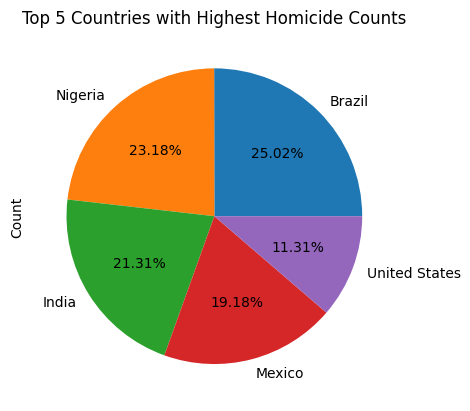

In [ ]:
# display the top 5 countries with highest homicide counts
df1.plot(x='Location', y='Count', kind='pie', labels = df1.Location, autopct='%1.2f%%', legend=False)
plt.title('Top 5 Countries with Highest Homicide Counts')
plt.legend().set_visible(False)
plt.show()

In [ ]:
# group by 'Region' and sum the 'Count' for each region, then sort the results
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2
                

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

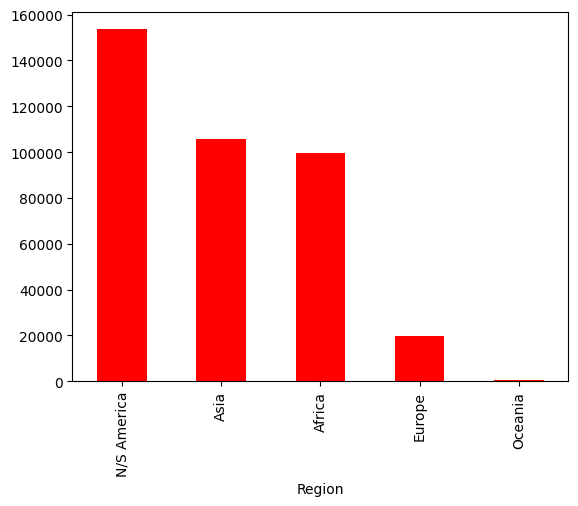

In [ ]:
# Plot the homicide counts by region
df2.plot(kind='bar', color = 'red')
plt.show()

In [ ]:
# group by 'Subregion' and sum the 'Count' for each subregion, then sort the results
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'South-Eastern Asia'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Northern America'),
  Text(7, 0, 'Southern Africa'),
  Text(8, 0, 'Eastern Europe'),
  Text(9, 0, 'Western Asia'),
  Text(10, 0, 'Eastern Asia'),
  Text(11, 0, 'Northern Africa'),
  Text(12, 0, 'Caribbean'),
  Text(13, 0, 'Middle Africa'),
  Text(14, 0, 'Northern Europe'),
  Text(15, 0, 'Western Europe'),
  Text(16, 0, 'Central Asia'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'Australia, New Zealand')])

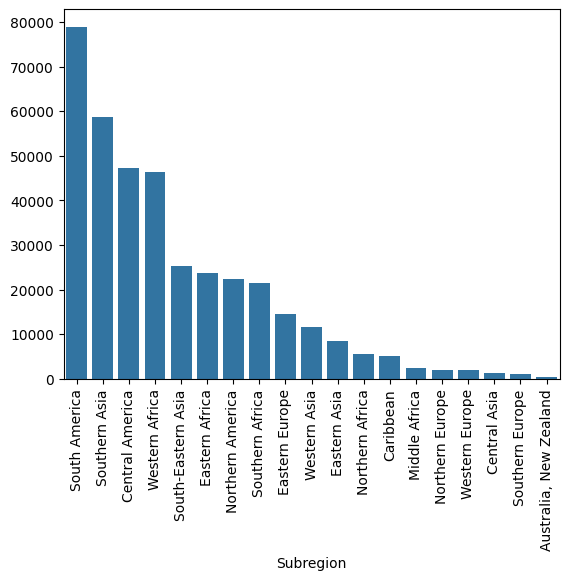

In [ ]:
# Plot the homicide counts by subregion
sns.barplot(x=df3.index, y=df3.values)
plt.xticks(rotation='vertical')

In [57]:
# Display the unique values in the 'Year' column
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2011     5
2013     5
2014     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [62]:
# Filter the DataFrame to include only rows where 'Region' is either 'Asia' or 'Europe'
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

In [66]:
# Filter the DataFrame to include only rows where 'Year' is greater than 2016 and select specific columns
df4 = df4[df4['Year'] > 2016][['Region', 'Year', 'Count']]

In [ ]:
# Group by 'Region' and 'Year', then sum the 'Count' for each group
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [ ]:
# Unstack the DataFrame to pivot the 'Region' index into columns
df_unstacked = df4.unstack(level=0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [73]:
# convert the index to string type for better readability in the plot
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

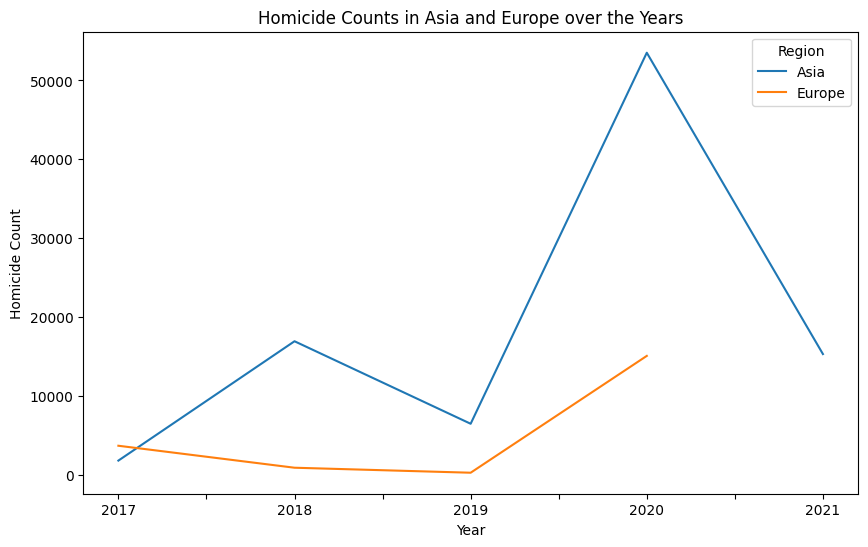

In [76]:
df_unstacked.plot(kind='line', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Homicide Count')
plt.title('Homicide Counts in Asia and Europe over the Years')
plt.show()

In [ ]:
# Group by 'Year' and sum the 'Rate' for each year, then sort the results
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int64

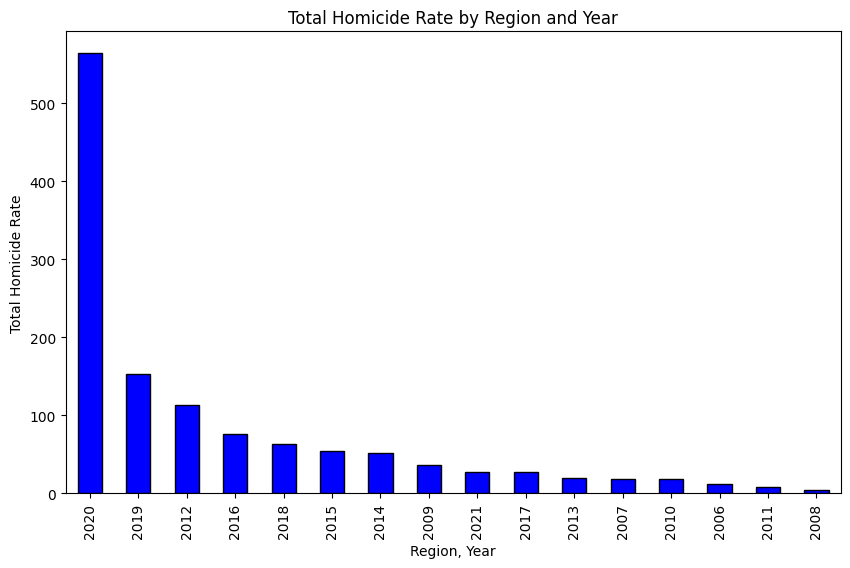

In [91]:
# display the Total Homicide Rate by Region and Year
df5.plot(kind='bar', figsize=(10,6), color='blue', edgecolor='black')
plt.xlabel('Region, Year')
plt.ylabel('Total Homicide Rate')
plt.title('Total Homicide Rate by Region and Year')
plt.show()

In [ ]:
# Group by 'Year' and 'Region', then sum the 'Count' for each group, sort by 'Year' in descending order, and select the top 40 rows
df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by='Year', ascending=False).head(40)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Asia          53516
     Africa        28460
     Europe        15066
2019 Europe          249
     Asia           6458
     Africa        44210
     N/S America    4276
     Oceania         126
2018 Asia          16923
     Europe          883
     N/S America   13793
2017 Asia           1787
     Africa         1467
     Europe         3670
2016 N/S America     608
     Asia            627
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 Asia           3029
     N/S America      13
2013 Asia           5782
2012 Africa        15264
     Asia             61
     N/S America      53
2011 Africa          855
     Asia           1626
     Europe            0
2010 Africa          303
     Europe            1
2009 Africa           27
     N/S America      42
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

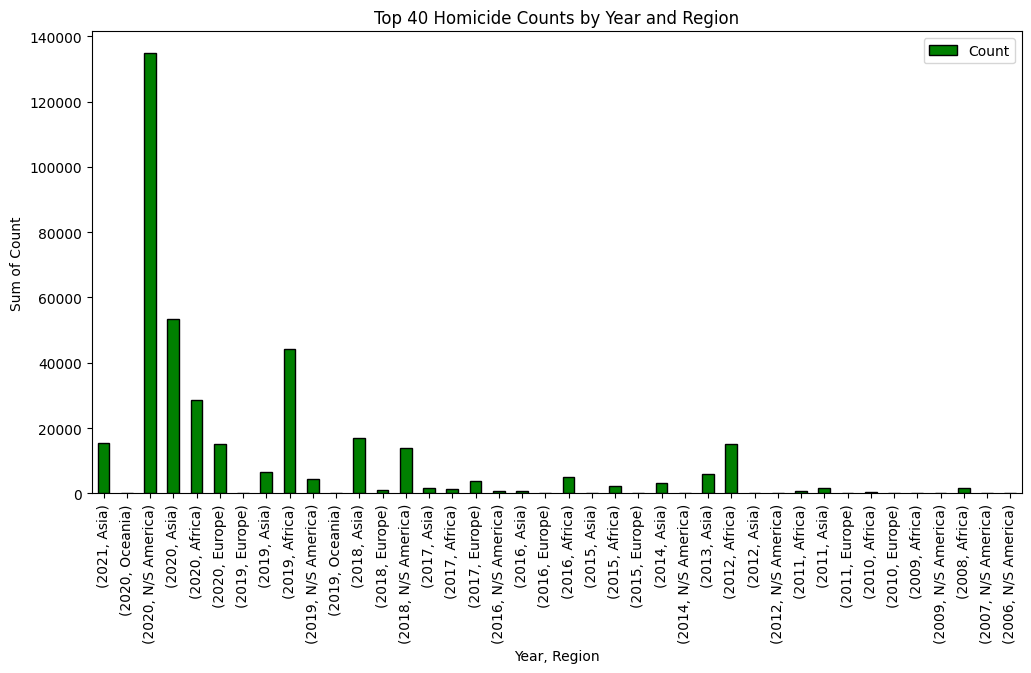

In [93]:
# Plot the top 40 homicide counts by year and region
df6.plot(kind='bar', figsize=(12, 6), color='green', edgecolor='black')
plt.xlabel('Year, Region')
plt.ylabel('Sum of Count')
plt.title('Top 40 Homicide Counts by Year and Region')
plt.show()

In [2]:
df.to_csv('python_homicide_data_project', index=False)

NameError: name 'df' is not defined